#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [5]:
df_copy = df.copy()

In [6]:
비수도권 = df_copy[(df_copy['사업체지역']!='서울')&(df_copy['사업체지역']!='경기')].copy()

model_1 = sm.Logit.from_formula('''LongWork2 ~ C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))''', 비수도권).fit()
print('==================================Model Summary=========================================')
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.392124
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03209
Time:                        20:38:27   Log-Likelihood:                -1052.5
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 6.987e-16
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.1317      0.089    -23.886      0.000      -2.307      -1.957
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     1.0136      0.129      7.862      0.000       0.761       1.266
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.1303      0.120      1.084      0.278      -0.105       0.366
==================================================================================================================
"""

In [9]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_1 = pd.DataFrame(
    {
        "OR": model_1.params,
        "Lower CI": model_1.conf_int()[0],
        "Upper CI": model_1.conf_int()[1],
    }
)
odds_ratios_1 = np.exp(odds_ratios_1)
odds_ratios_1

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.11864,0.09960,0.14132
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.75548,2.14023,3.54760
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.13922,0.89999,1.44204


In [7]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    +  C(보험가입여부,Treatment('가입하지않음')) + 주당근로시간''', 비수도권).fit()
print('==================================Model Summary=========================================')
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.391353
         Iterations 6
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2680
Method:                           MLE   Df Model:                            3
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03400
Time:                        20:40:51   Log-Likelihood:                -1050.4
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 6.130e-16
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.4447      0.182    -13.413      0.000      -2.802      -2.088
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     1.0052      0.129      7.801      0.000       0.753       1.258
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.0406      0.127      0.320      0.749      -0.208       0.290
주당근로시간                                             0.0101      0.005      2.030      0.042       0.000       0.020
==================================================================================================================
"""

In [8]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_2 = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios_2 = np.exp(odds_ratios_2)
odds_ratios_2

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.08675,0.06069,0.12400
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.73257,2.12271,3.51764
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.04148,0.81190,1.33598
주당근로시간,1.01013,1.00035,1.02000


In [9]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    + C(보험가입여부,Treatment('가입하지않음'))
    + 주당근로시간 + C(직장만족도,Treatment('그렇지않다'))''', 비수도권).fit()
print('==================================Model Summary=========================================')
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.373986
         Iterations 7
==================================Model Summary=========================================


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2678
Method:                           MLE   Df Model:                            5
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.07686
Time:                        20:41:55   Log-Likelihood:                -1003.8
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 2.948e-34
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -3.7234      0.278    -13.403      0.000      -4.268      -3.179
C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]     0.8153      0.132      6.168      0.000       0.556       1.074
C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]             0.0861      0.128      0.670      0.503      -0.166       0.338
C(직장만족도, Treatment('그렇지않다'))[T.그렇다]                1.6308      0.214      7.631      0.000       1.212       2.050
C(직장만족도, Treatment('그렇지않다'))[T.보통이다]               0.8344      0.224      3.725      0.000       0.395       1.273
주당근로시간                                             0.0149      0.005      2.950      0.003       0.005       0.025
==================================================================================================================
"""

In [11]:
print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

==================================Odds Ratio=========================================


,OR,Lower CI,Upper CI
Intercept,0.02415,0.01401,0.04163
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.25976,1.74405,2.92796
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.08991,0.84728,1.40202
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",5.10813,3.36017,7.76537
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",2.30336,1.48496,3.57282
주당근로시간,1.01502,1.00502,1.02513


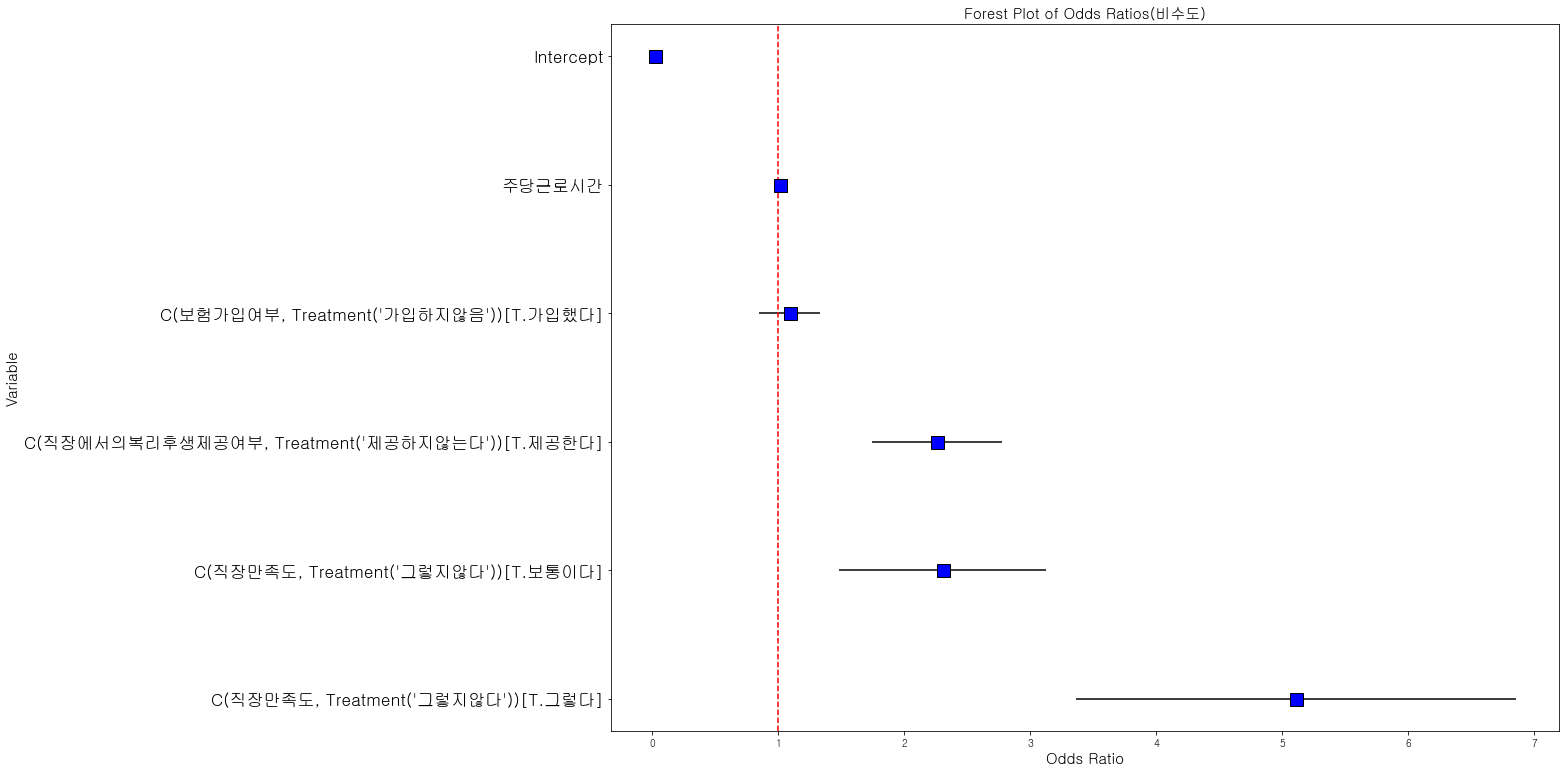

In [13]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(비수도)', fontsize=15)

# Show the plot
plt.show()

##### 단변-------------

In [14]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    + C(직장에서의복리후생제공여부,Treatment('제공하지않는다'))
    ''', 비수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.392343
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.03155
Time:                        20:45:46   Log-Likelihood:                -1053.0
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 1.195e-16
                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.12615,0.11049,0.14404
"C(직장에서의복리후생제공여부, Treatment('제공하지않는다'))[T.제공한다]",2.87846,2.26302,3.66126


In [15]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    C(보험가입여부,Treatment('가입하지않음'))
    ''', 비수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.403011
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.005221
Time:                        20:46:07   Log-Likelihood:                -1081.7
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 0.0007526
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.13204,0.11137,0.15655
"C(보험가입여부, Treatment('가입하지않음'))[T.가입했다]",1.46039,1.16969,1.82333


In [16]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
   주당근로시간''', 비수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.403074
         Iterations 6
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2682
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                0.005064
Time:                        20:46:26   Log-Likelihood:                -1081.9
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 0.0009046
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.34

,OR,Lower CI,Upper CI
Intercept,0.09622,0.06836,0.13542
주당근로시간,1.01466,1.00583,1.02358


In [17]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 
    C(직장만족도,Treatment('그렇지않다'))''', 비수도권).fit()
print('==================================Model Summary=========================================')
print(model_3.summary())

print('==================================Odds Ratio=========================================')
# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

Optimization terminated successfully.
         Current function value: 0.385323
         Iterations 7
==================================Model Summary=========================================
                           Logit Regression Results                           
Dep. Variable:              LongWork2   No. Observations:                 2684
Model:                          Logit   Df Residuals:                     2681
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Aug 2023   Pseudo R-squ.:                 0.04888
Time:                        20:46:46   Log-Likelihood:                -1034.2
converged:                       True   LL-Null:                       -1087.4
Covariance Type:            nonrobust   LLR p-value:                 8.253e-24
                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

,OR,Lower CI,Upper CI
Intercept,0.05222,0.03547,0.07690
"C(직장만족도, Treatment('그렇지않다'))[T.그렇다]",5.30665,3.51300,8.01609
"C(직장만족도, Treatment('그렇지않다'))[T.보통이다]",2.25638,1.46068,3.48553
